In [144]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from math import sqrt

In [145]:
df = pd.read_csv ('Walmart_Store_sales.csv')

In [146]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [147]:
df.shape

(6435, 8)

In [148]:
df.Weekly_Sales

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

In [149]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [150]:
print('Store with max sales value')
df.max()

Store with max sales value


Store                    45
Date             31-12-2010
Weekly_Sales    3.81869e+06
Holiday_Flag              1
Temperature          100.14
Fuel_Price            4.468
CPI                 227.233
Unemployment         14.313
dtype: object

In [151]:
print('std deviation')
df.std(axis=0)

std deviation


Store               12.988182
Weekly_Sales    564366.622054
Holiday_Flag         0.255049
Temperature         18.444933
Fuel_Price           0.459020
CPI                 39.356712
Unemployment         1.875885
dtype: float64

In [152]:
df.min()

Store                    1
Date            01-04-2011
Weekly_Sales        209986
Holiday_Flag             0
Temperature          -2.06
Fuel_Price           2.472
CPI                126.064
Unemployment         3.879
dtype: object

In [153]:
df.Weekly_Sales

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

In [154]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [155]:
def calculate_StoreSales(store_Num):
    df_store=df.loc[df['Store']==store_Num]
    return df_store

In [156]:
store_sales_list=[]
for i in range(1,46):
    df_store=calculate_StoreSales(i)
    print("The size of store {} is {}".format(i,calculate_StoreSales(i).shape))
    store_Sales=sum(list(df_store['Weekly_Sales']))
    store_sales_list.append(store_Sales)
    print("Total sales done by store {} is {}".format(i,store_Sales))

The size of store 1 is (143, 8)
Total sales done by store 1 is 222402808.85000005
The size of store 2 is (143, 8)
Total sales done by store 2 is 275382440.9800001
The size of store 3 is (143, 8)
Total sales done by store 3 is 57586735.07
The size of store 4 is (143, 8)
Total sales done by store 4 is 299543953.38
The size of store 5 is (143, 8)
Total sales done by store 5 is 45475688.9
The size of store 6 is (143, 8)
Total sales done by store 6 is 223756130.64000002
The size of store 7 is (143, 8)
Total sales done by store 7 is 81598275.14
The size of store 8 is (143, 8)
Total sales done by store 8 is 129951181.13
The size of store 9 is (143, 8)
Total sales done by store 9 is 77789218.99
The size of store 10 is (143, 8)
Total sales done by store 10 is 271617713.8899999
The size of store 11 is (143, 8)
Total sales done by store 11 is 193962786.79999992
The size of store 12 is (143, 8)
Total sales done by store 12 is 144287230.14999998
The size of store 13 is (143, 8)
Total sales done by 

In [157]:
max_storeSales=max(store_sales_list)
max_storeSales

301397792.46000004

In [158]:
enumerate_store_sales_list=enumerate(store_sales_list)
print(list(enumerate_store_sales_list))

[(0, 222402808.85000005), (1, 275382440.9800001), (2, 57586735.07), (3, 299543953.38), (4, 45475688.9), (5, 223756130.64000002), (6, 81598275.14), (7, 129951181.13), (8, 77789218.99), (9, 271617713.8899999), (10, 193962786.79999992), (11, 144287230.14999998), (12, 286517703.80000013), (13, 288999911.34000003), (14, 89133683.91999997), (15, 74252425.40000002), (16, 127782138.83000007), (17, 155114734.21), (18, 206634862.1), (19, 301397792.46000004), (20, 108117878.92), (21, 147075648.57000002), (22, 198750617.8499999), (23, 194016021.27999994), (24, 101061179.16999999), (25, 143416393.79000008), (26, 253855916.88000003), (27, 189263680.57999986), (28, 77141554.30999997), (29, 62716885.12000001), (30, 199613905.49999997), (31, 166819246.16000003), (32, 37160221.960000016), (33, 138249763.00000003), (34, 131520672.07999992), (35, 53412214.969999984), (36, 74202740.32000001), (37, 55159626.420000024), (38, 207445542.46999997), (39, 137870309.79000008), (40, 181341934.88999993), (41, 795657

In [159]:
for i in range(1,46):
    if store_sales_list[i]==max_storeSales:
        print(" The maxmium sales done by store {}".format(i))
        break

 The maxmium sales done by store 19


In [160]:
df['Store'].value_counts()/df.shape[0]

43    0.022222
41    0.022222
33    0.022222
29    0.022222
25    0.022222
21    0.022222
17    0.022222
13    0.022222
9     0.022222
5     0.022222
1     0.022222
44    0.022222
40    0.022222
36    0.022222
32    0.022222
28    0.022222
24    0.022222
20    0.022222
16    0.022222
12    0.022222
8     0.022222
37    0.022222
45    0.022222
39    0.022222
2     0.022222
35    0.022222
31    0.022222
27    0.022222
23    0.022222
19    0.022222
15    0.022222
11    0.022222
7     0.022222
3     0.022222
42    0.022222
38    0.022222
34    0.022222
30    0.022222
26    0.022222
22    0.022222
18    0.022222
14    0.022222
10    0.022222
6     0.022222
4     0.022222
Name: Store, dtype: float64

In [161]:
df[['Store','Weekly_Sales','Holiday_Flag']]

,Store,Weekly_Sales,Holiday_Flag
0,1,1643690.90,0
1,1,1641957.44,1
2,1,1611968.17,0
3,1,1409727.59,0
4,1,1554806.68,0
...,...,...,...
6430,45,713173.95,0
6431,45,733455.07,0
6432,45,734464.36,0
6433,45,718125.53,0


In [162]:
grpbystore = df.groupby('Store')
print(type(grpbystore))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [163]:
grpbystore.mean()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
1,1.555264e+06,0.06993,68.306783,3.219699,215.996892,7.610420
2,1.925751e+06,0.06993,68.216364,3.219699,215.646311,7.623846
3,4.027044e+05,0.06993,71.434196,3.219699,219.391531,7.176986
4,2.094713e+06,0.06993,62.253357,3.216972,128.679669,5.964692
5,3.180118e+05,0.06993,69.410140,3.219699,216.565581,6.295406
6,1.564728e+06,0.06993,69.700000,3.219699,217.553197,6.606902
7,5.706173e+05,0.06993,39.720280,3.241559,193.664243,8.585734
8,9.087495e+05,0.06993,62.513986,3.219699,219.439026,6.091846
9,5.439806e+05,0.06993,67.775175,3.219699,219.626689,6.099881


In [164]:
grpbystore.sum()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
1,2.224028e+08,10,9767.87,460.417,30887.555523,1088.290
2,2.753824e+08,10,9754.94,460.417,30837.422420,1090.210
3,5.758674e+07,10,10215.09,460.417,31372.988971,1026.309
4,2.995440e+08,10,8902.23,460.027,18401.192733,852.951
5,4.547569e+07,10,9925.65,460.417,30968.878137,900.243
6,2.237561e+08,10,9967.10,460.417,31110.107182,944.787
7,8.159828e+07,10,5680.00,463.543,27693.986741,1227.760
8,1.299512e+08,10,8939.50,460.417,31379.780750,871.134
9,7.778922e+07,10,9691.85,460.417,31406.616557,872.283


In [165]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [166]:
df.groupby('Weekly_Sales').max()

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,,,,,,,
209986.25,33,03-12-2010,0,52.82,3.041,126.731333,9.265
213538.32,33,29-10-2010,0,71.34,3.130,126.436419,9.265
215359.21,33,30-12-2011,1,51.60,3.428,130.071032,8.010
219804.85,33,31-12-2010,1,52.91,3.148,127.087677,9.265
220060.35,33,02-12-2011,0,59.12,3.701,129.845967,8.010
...,...,...,...,...,...,...,...
3595903.20,13,24-12-2010,0,34.90,2.846,126.983581,7.795
3676388.98,4,23-12-2011,0,35.92,3.103,129.984548,5.143
3749057.69,10,24-12-2010,0,57.06,3.236,126.983581,9.003


In [167]:
 def calculate_Std_Storessales(): 
        std_deviationList=[]
        for i in range(1,46): 
            data_frame=calculate_StoreSales(i)
            data=data_frame['Weekly_Sales']
            standarddeviation=data.std(axis=0) 
            std_deviationList.append(standarddeviation) 
        return std_deviationList

In [168]:
data_frame=calculate_StoreSales(1)
data=data_frame['Weekly_Sales']

In [169]:
std_list = calculate_Std_Storessales()
len(std_list)

45

In [170]:
max_std=max(std_list)
print(max_std)

317569.9494755083


In [171]:
for i in range(1,45):
    if std_list[i]==max(std_list):
        print("Maximum std deviation is of store number {}".format(i))

Maximum std deviation is of store number 13


In [172]:
 def create_QuaterCol():
        for i in range(1,6436): 
            data = df.iloc[i,1] 
            if int(data[3:5])>0 & int(data[3:5])<=3: 
                df['quaterName']==1 
            elif int(data[3:5])>3 & int(data[3:5])<=6:
                df['quaterName']==2 
            elif int(data[3:5])>6 & int(data[3:5])<=9: 
                df['quaterName']==3 
            elif int(data[3:5])>9 & int(data[3:5])<=12: 
                df['quaterName']==4 
        print("done")

In [173]:
date=df.iloc[0,1] 
num=int(date[3:5])>0 
if num>0 | num<=3 :
    df_aux['quater']=1

In [174]:
date=df.iloc[0,1] 
date[3:5]

'02'

In [175]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [176]:
df['QuarterName']=1

In [177]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,QuarterName
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,1
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,1
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,1
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,1
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,1


In [178]:
for i in range(0,6435): 
        data = df.iloc[i,1] 
        if int(data[3:5]) in range(1,4): 
            df.iloc[i,8]=1 
            df.iloc[i,8]=df.iloc[i,8].astype('int')
        # df['quaterName']=df.iloc[i:,9].replace(1,1) 
        elif int(data[3:5]) in range(4,7): 
            df.iloc[i,8]=2 
            df.iloc[i,8]=df.iloc[i,8].astype('int') 
        elif int(data[3:5]) in range(7,10): 
            df.iloc[i,8]=3 
            df.iloc[i,8]=df.iloc[i,8].astype('int')
        elif int(data[3:5]) in range(10,13): 
            df.iloc[i,8]=4 
            df.iloc[i,8]=df.iloc[i,8].astype('int')
            
print("done")

done


In [179]:
 r=df.loc[df['QuarterName']==4]

In [180]:
r.shape

(1395, 9)

In [181]:
 df.iloc[1,8].astype('int')

1

In [182]:
def getQuaterSales(storeNum,quaterNum):
    df_Store1=calculate_StoreSales(storeNum)
    df_aux=df_Store1.loc[df_Store1['QuarterName']==quaterNum] 
    return sum(list(df_aux['Weekly_Sales']))

In [183]:
 #Store 1 quater sale list 
store1_quaterSale=[]
store1_quaterSale.append(getQuaterSales(1,1)) 
store1_quaterSale.append(getQuaterSales(1,2))
store1_quaterSale.append(getQuaterSales(1,3))
store1_quaterSale.append(getQuaterSales(1,4))

In [184]:
store2_quaterSale=[]
store2_quaterSale.append(getQuaterSales(2,1)) 
store2_quaterSale.append(getQuaterSales(2,2))
store2_quaterSale.append(getQuaterSales(2,3))
store2_quaterSale.append(getQuaterSales(2,4))

In [185]:
store3_quaterSale=[]
store3_quaterSale.append(getQuaterSales(3,1)) 
store3_quaterSale.append(getQuaterSales(3,2))
store3_quaterSale.append(getQuaterSales(3,3))
store3_quaterSale.append(getQuaterSales(3,4))

In [186]:
store4_quaterSale=[]
store4_quaterSale.append(getQuaterSales(4,1)) 
store4_quaterSale.append(getQuaterSales(4,2))
store4_quaterSale.append(getQuaterSales(4,3))
store4_quaterSale.append(getQuaterSales(4,4))

In [187]:
max_QuaterSales_List=[] 
max_QuaterSales_List.append(max(store1_quaterSale)) 
max_QuaterSales_List.append(max(store2_quaterSale))
max_QuaterSales_List.append(max(store3_quaterSale)) 
max_QuaterSales_List.append(max(store4_quaterSale))

In [188]:
 list(enumerate(max_QuaterSales_List))

[(0, 60428109.279999994),
 (1, 74356863.71000001),
 (2, 15459189.579999998),
 (3, 81194592.89)]

In [189]:
max(max_QuaterSales_List)

81194592.89

In [190]:
#Now let uscalculate about holidays

In [191]:
Holiday_df=df.loc[df['Holiday_Flag']==1]

In [192]:
Holiday_df.shape

(450, 9)

In [193]:
Super_BowlHoliday_df=Holiday_df.loc[Holiday_df['QuarterName']==1]
labourday_df=Holiday_df.loc[Holiday_df['QuarterName']==3]
thanks_and_Chris_df=Holiday_df.loc[Holiday_df['QuarterName']==4]

In [194]:
print(Super_BowlHoliday_df.shape)
print(labourday_df.shape)
print(thanks_and_Chris_df.shape)

(135, 9)
(135, 9)
(180, 9)


In [195]:
Super_BowlHoliday_df_TotalSales=sum(list(Super_BowlHoliday_df['Weekly_Sales']))
Super_BowlHoliday_df_TotalSales

145682278.33999994

In [196]:
labourday_df_TotalSales=sum(list(labourday_df['Weekly_Sales']))
labourday_df_TotalSales

140727684.67999998

In [197]:
thanks_and_Chris_df_TotalSales=sum(list(thanks_and_Chris_df['Weekly_Sales']))
thanks_and_Chris_df_TotalSales

218889588.54000002

In [198]:
#the above figures shows that thanksgiving and christmas has good sales as compared to other holidays


In [199]:
#nowlwt us create a new column of mnth 

In [200]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,QuarterName
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,1
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,3
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,4
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,4
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,4


In [201]:
Mnth_df=df['Date'].str.split('/',expand=True)

In [202]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,QuarterName
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,1
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,3
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,4
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,4
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,4


In [203]:
df.drop('mm',axis=1,inplace=True)

KeyError: "['mm'] not found in axis"

In [204]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,QuarterName
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,1
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,3
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,4
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,4
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,4


In [205]:
 df_store1=calculate_StoreSales(1)

In [206]:
 df_store1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,QuarterName
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,1


In [207]:
import datetime 
import calendar
def findDay(date):
    born = datetime.datetime.strptime(date, '%d-%m-%Y').weekday()
    return (calendar.day_name[born])
# Driver program
date = df_store1.iloc[4,1] 
print(findDay(date))

Friday


In [208]:
df['Month']=1
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,QuarterName,Month
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,1,1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1,1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,1,1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,1,1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,1,1
...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,3,1
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,4,1
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,4,1
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,4,1


In [209]:
# got help in dng the below syntax

In [213]:
for i in range(0,6434):
        data = df.iloc[i,1]
        if int(data[3:5])==1:
            df.iloc[i,9]=1 
            #df.iloc[i,10]=df.iloc[i,10].astype('int')
            # df['quaterName']=df.iloc[i:,9].replace(1,1) 
        elif int(data[3:5])==2: 
            df.iloc[i,9]=2 
            #df.iloc[i,10]=df.iloc[i,10].astype('int') 
        elif int(data[3:5])==3: 
            df.iloc[i,9]=3 
            #df.iloc[i,9]=df.iloc[i,10].astype('int') 
        elif int(data[3:5])==4:
            df.iloc[i,9]=4 
            #df.iloc[i,9]=df.iloc[i,10].astype('int') 
        elif int(data[3:5])==5: 
            df.iloc[i,9]=5 
            #df.iloc[i,9]=df.iloc[i,10].astype('int') 
        elif int(data[3:5])==6: 
            df.iloc[i,9]=6 
            #df.iloc[i,9]=df.iloc[i,10].astype('int') 
        elif int(data[3:5])==7:
            df.iloc[i,9]=7 
            #df.iloc[i,9]=df.iloc[i,10].astype('int') 
        elif int(data[3:5])==8:
            df.iloc[i,9]=8
            #df.iloc[i,9]=df.iloc[i,10].astype('int') 
        elif int(data[3:5])==8: 
            df.iloc[i,9]=9 
             #df.iloc[i,9]=df.iloc[i,10].astype('int') 
        elif int(data[3:5])==10: 
            df.iloc[i,9]=10 
            #df.iloc[i,9]=df.iloc[i,10].astype('int') 
        elif int(data[3:5])==11: 
            df.iloc[i,9]=11 
            #df.iloc[i,9]=df.iloc[i,10].astype('int') 
        elif int(data[3:5])==12: 
            df.iloc[i,9]=12 
            #df.iloc[i,9]=df.iloc[i,10].astype('int')
print("done")

done


In [214]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,QuarterName,Month
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,1,2
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1,2
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,1,2
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,1,2
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,1,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,3,1
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,4,10
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,4,10
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,4,10


In [215]:
df['sem']=1 
for i in range(0,6434): 
        data = df.iloc[i,1] 
        if int(data[3:5]) in range(1,7): 
            df.iloc[i,10]=1 
        #df.iloc[i,10]=df.iloc[i,11].astype('int') 
        # df['quaterName']=df.iloc[i:,9].replace(1,1) 
        elif int(data[3:5]) in range(7,13): 
            df.iloc[i,10]=2
            #df.iloc[i,10]=df.iloc[i,11].astype('int')
print("done")

done


In [216]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,QuarterName,Month,sem
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,1,2,1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1,2,1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,1,2,1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,1,2,1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,3,1,2
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,4,10,2
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,4,10,2
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,4,10,2


In [217]:
 import matplotlib.pyplot as plt

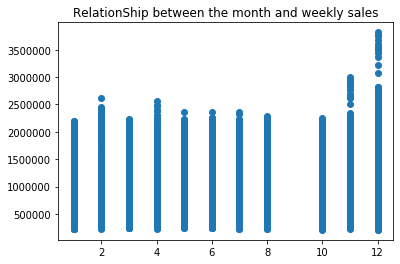

In [218]:
plt.scatter(df.Month,df.Weekly_Sales)
plt.title("RelationShip between the month and weekly sales")
plt.show()

In [219]:
df.shape

(6435, 11)

In [220]:
 df.loc[df['sem']==1]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,QuarterName,Month,sem
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,1,2,1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1,2,1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,1,2,1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,1,2,1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...
6414,45,08-06-2012,795133.00,0,64.30,3.689,191.015533,8.567,2,6,1
6415,45,15-06-2012,821498.18,0,71.93,3.620,191.029973,8.567,2,6,1
6416,45,22-06-2012,822569.16,0,74.22,3.564,191.064610,8.567,2,6,1
6417,45,29-06-2012,773367.71,0,75.22,3.506,191.099246,8.567,2,6,1


In [221]:
df_aux=df

In [222]:
df_aux

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,QuarterName,Month,sem
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,1,2,1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1,2,1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,1,2,1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,1,2,1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,3,1,2
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,4,10,2
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,4,10,2
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,4,10,2


In [223]:
 df['Day']=df_aux['Date'].map(lambda text: findDay(text))

In [224]:
df['Day']

0       Friday
1       Friday
2       Friday
3       Friday
4       Friday
         ...  
6430    Friday
6431    Friday
6432    Friday
6433    Friday
6434    Friday
Name: Day, Length: 6435, dtype: object

In [225]:
from sklearn.linear_model import LinearRegression 
from sklearn import model_selection
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt

In [226]:
df.drop('Date',axis=1,inplace=True)

In [227]:
df.drop('Day',axis=1,inplace=True)

In [228]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'QuarterName', 'Month', 'sem'],
      dtype='object')

In [229]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
QuarterName     0
Month           0
sem             0
dtype: int64

In [230]:
X=df.drop('Weekly_Sales',axis=1)
Y=df['Weekly_Sales']

In [231]:
X

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,QuarterName,Month,sem
0,1,0,42.31,2.572,211.096358,8.106,1,2,1
1,1,1,38.51,2.548,211.242170,8.106,1,2,1
2,1,0,39.93,2.514,211.289143,8.106,1,2,1
3,1,0,46.63,2.561,211.319643,8.106,1,2,1
4,1,0,46.50,2.625,211.350143,8.106,1,3,1
...,...,...,...,...,...,...,...,...,...
6430,45,0,64.88,3.997,192.013558,8.684,3,1,2
6431,45,0,64.89,3.985,192.170412,8.667,4,10,2
6432,45,0,54.47,4.000,192.327265,8.667,4,10,2
6433,45,0,56.47,3.969,192.330854,8.667,4,10,2


In [232]:
Y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

In [233]:
X.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'QuarterName', 'Month', 'sem'],
      dtype='object')

In [235]:
 X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.3,random_state=42)

In [236]:
print(X_train.shape) 
print(X_test.shape) 
print(Y_train.shape)
print(Y_test.shape)

(4504, 9)
(1931, 9)
(4504,)
(1931,)


In [237]:
model=LinearRegression(n_jobs=-1)

In [238]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [240]:
print(model.intercept_)
print(model.coef_)

1904221.1289494382
[-14912.96607573  94290.40832838   -735.37849064   8342.02747433
  -2331.15686253 -24162.34067961 -24285.90831686  19168.71403623
  24699.00542413]


In [242]:
pred_train=model.predict(X_train)
pred_test=model.predict(X_test)

In [243]:
pred_train

array([1344156.26911481, 1160364.85983964, 1209688.33875655, ...,
        752162.67559339,  995198.39585292, 1180158.88011589])

In [244]:
from math import sqrt 
print(sqrt(mean_squared_error(Y_train,pred_train)))

520754.0486755962


In [245]:
print(sqrt(mean_squared_error(Y_test,pred_test)))

518684.1428532117


In [246]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'QuarterName', 'Month', 'sem'],
      dtype='object')

In [249]:
Predictors=('Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price','CPI', 'Unemployment', 'QuarterName', 'Month', 'sem')

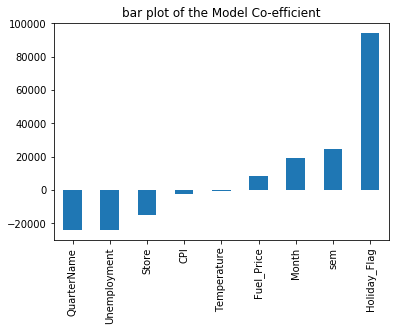

In [250]:
coef=pd.Series(model.coef_,Predictors).sort_values() 
coef.plot(kind='bar',title='bar plot of the Model Co-efficient')

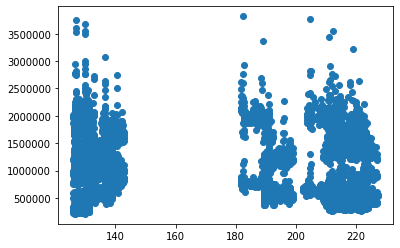

In [251]:
 plt.scatter(df.CPI,df.Weekly_Sales)

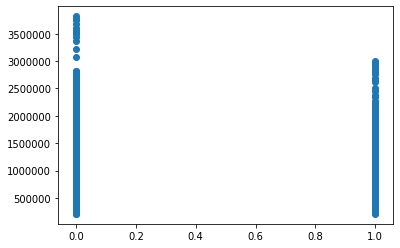

In [253]:
plt.scatter(df.Holiday_Flag,df.Weekly_Sales)

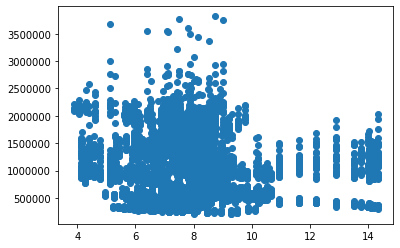

In [254]:
 plt.scatter(df.Unemployment,df.Weekly_Sales)

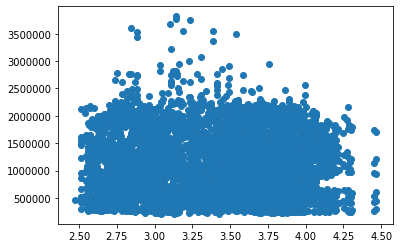

In [255]:
 plt.scatter(df.Fuel_Price,df.Weekly_Sales)

In [257]:
pd.DataFrame({'Actual':Y_test,'Predicted':model.predict(X_test)})

,Actual,Predicted
2436,1138800.32,1.156383e+06
3361,1304850.67,1.106119e+06
233,1769296.25,1.311616e+06
3667,1077640.13,1.178202e+06
5011,428851.99,7.078245e+05
...,...,...
1465,1293472.80,1.171452e+06
6270,323410.94,8.847477e+05
4522,1151258.74,9.039204e+05
219,1743816.41,1.258778e+06


In [ ]:
#to predict which festival did more sales we use KNN method

In [259]:
x=df.drop('sem',axis=1) 
print(x.columns) 
y=df['sem']

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'QuarterName', 'Month'],
      dtype='object')


In [260]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.3,random_state=42)

In [262]:
print(x_train.shape) 
print(x_test.shape) 
print(y_train.shape)
print(y_test.shape)

(4504, 9)
(1931, 9)
(4504,)
(1931,)


In [264]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
model=KNeighborsClassifier(n_neighbors=20) 
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [265]:
x.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'QuarterName', 'Month'],
      dtype='object')

In [266]:
Indepv=list(x_train.columns)
Indepv

['Store',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'QuarterName',
 'Month']

In [267]:
Depv=['sem']

In [268]:
predicted_train=model.predict(x_train) 
len(predicted_train)

4504

In [269]:
Y_train.shape

(4504,)

In [270]:
print("The train Accuracy {:.2%}".format(accuracy_score(y_train,predicted_train)))

The train Accuracy 60.46%


In [271]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train) 
predicted_train=model.predict(x_train) 
print("The train Accuracy {:.2%}".format(accuracy_score(y_train,predicted_train)))

The train Accuracy 69.76%


In [272]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
model=KNeighborsClassifier(n_neighbors=4)
model.fit(x_train,y_train) 
predicted_train=model.predict(x_train) 
print("The train Accuracy {:.2%}".format(accuracy_score(y_train,predicted_train)))

The train Accuracy 70.05%


In [273]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
model=KNeighborsClassifier(n_neighbors=4)
model.fit(x_train,y_train) 
predicted_train=model.predict(x_train) 
print("The train Accuracy {:.2%}".format(accuracy_score(y_train,predicted_train)))

The train Accuracy 70.05%


In [275]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train) 
predicted_train=model.predict(x_train) 
print("The train Accuracy {:.2%}".format(accuracy_score(y_train,predicted_train)))

The train Accuracy 76.11%


In [276]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train) 
predicted_train=model.predict(x_train) 
print("The train Accuracy {:.2%}".format(accuracy_score(y_train,predicted_train)))

The train Accuracy 76.11%
